In [143]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [144]:
onecall = True  # 8 days
#onecall = False # 5 days

In [145]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [146]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [147]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [148]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,rain
0,27/08,07:00,20:43,01:00,17:11,0.79,"{'day': 22.41, 'min': 17.47, 'max': 27.79, 'ni...","{'day': 21.96, 'night': 22.43, 'eve': 26.55, '...",1019,48,10.87,3.15,110,5.68,"[{'id': 802, 'main': 'Clouds', 'description': ...",44,0.00,5.92,NaN
1,28/08,07:02,20:41,00:26,18:12,0.82,"{'day': 27.84, 'min': 18.69, 'max': 32.11, 'ni...","{'day': 27.53, 'night': 26.62, 'eve': 29.34, '...",1014,40,12.84,3.77,211,5.28,"[{'id': 800, 'main': 'Clear', 'description': '...",9,0.00,5.86,NaN
2,29/08,07:03,20:39,01:24,18:59,0.85,"{'day': 26.37, 'min': 20.57, 'max': 28.09, 'ni...","{'day': 26.37, 'night': 22, 'eve': 27.17, 'mor...",1017,43,12.49,4.09,5,6.12,"[{'id': 803, 'main': 'Clouds', 'description': ...",77,0.00,5.45,NaN
3,30/08,07:05,20:37,02:31,19:34,0.88,"{'day': 22.85, 'min': 18.59, 'max': 26.23, 'ni...","{'day': 22.86, 'night': 21.29, 'eve': 24.54, '...",1019,64,15.40,4.34,36,8.65,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,0.96,3.90,0.69
4,31/08,07:06,20:35,03:45,19:59,0.92,"{'day': 24.97, 'min': 16.79, 'max': 28.43, 'ni...","{'day': 25.04, 'night': 21.63, 'eve': 25.61, '...",1017,58,16.10,3.45,27,8.24,"[{'id': 500, 'main': 'Rain', 'description': 'l...",86,1.00,1.61,6.28
5,01/09,07:07,20:33,04:58,20:17,0.95,"{'day': 22.41, 'min': 19.43, 'max': 23.56, 'ni...","{'day': 22.9, 'night': 19.83, 'eve': 20.9, 'mo...",1014,84,19.29,2.54,264,7.53,"[{'id': 501, 'main': 'Rain', 'description': 'm...",91,1.00,2.00,9.12
6,02/09,07:09,20:31,06:10,20:32,0.98,"{'day': 25.92, 'min': 17.76, 'max': 27.15, 'ni...","{'day': 25.82, 'night': 23.09, 'eve': 25.17, '...",1016,48,13.79,3.15,201,6.78,"[{'id': 801, 'main': 'Clouds', 'description': ...",23,0.58,2.00,NaN
7,03/09,07:10,20:29,07:20,20:46,0.00,"{'day': 27.44, 'min': 19.73, 'max': 28.56, 'ni...","{'day': 27.57, 'night': 23.75, 'eve': 26.15, '...",1018,46,14.59,2.52,346,4.15,"[{'id': 500, 'main': 'Rain', 'description': 'l...",21,0.29,2.00,0.12


In [149]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi', 'rain'],
       dtype='object'),
 19)

In [150]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            28/08
sunrise       07:02
sunset        20:41
moonrise      00:26
moonset       18:12
moon_phase     0.82
pressure       1014
humidity         40
dew_point     12.84
wind_speed     3.77
wind_deg        211
wind_gust      5.28
pop             0.0
uvi            5.86
Name: 1, dtype: object

In [151]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17])

In [152]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        27/08
sunrise                                                   07:00
sunset                                                    20:43
moonrise                                                  01:00
moonset                                                   17:11
moon_phase                                                 0.79
temp          {'day': 22.41, 'min': 17.47, 'max': 27.79, 'ni...
feels_like    {'day': 21.96, 'night': 22.43, 'eve': 26.55, '...
pressure                                                   1019
humidity                                                     48
dew_point                                                 10.87
wind_speed                                                 3.15
wind_deg                                                    110
wind_gust                                                  5.68
weather       [{'id': 802, 'main': 'Clouds', 'description': ...
clouds                      

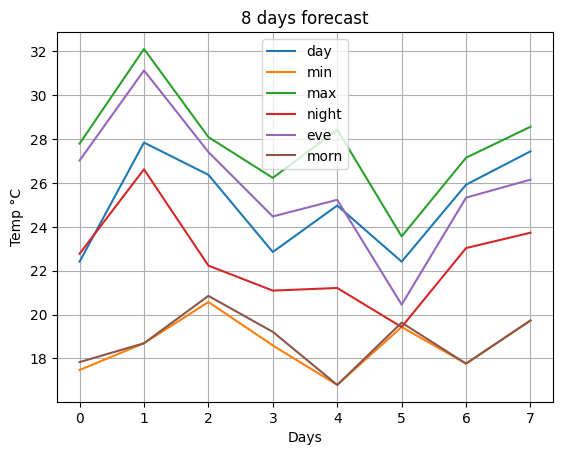

In [153]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [154]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1724749200, 'main': {'temp': 19.16, 'feels_like': 18.83, 'temp_min': 19.16, 'temp_max': 21.17, 'pressure': 1020, 'sea_level': 1020, 'grnd_level': 1011, 'humidity': 65, 'temp_kf': -2.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 0}, 'wind': {'speed': 2.06, 'deg': 116, 'gust': 3.31}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-27 09:00:00'}, {'dt': 1724760000, 'main': {'temp': 21.4, 'feels_like': 21.01, 'temp_min': 21.4, 'temp_max': 25.87, 'pressure': 1019, 'sea_level': 1019, 'grnd_level': 1009, 'humidity': 54, 'temp_kf': -4.47}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 21}, 'wind': {'speed': 2.78, 'deg': 110, 'gust': 3.4}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-27 12:00:00'}, {'dt': 1724770800, 'main': {'temp': 24.91, 'feels_li

In [155]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1724749200
main          {'temp': 19.16, 'feels_like': 18.83, 'temp_min...
weather       [{'id': 800, 'main': 'Clear', 'description': '...
clouds                                               {'all': 0}
wind                  {'speed': 2.06, 'deg': 116, 'gust': 3.31}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-27 09:00:00
rain                                                        NaN
Name: 0, dtype: object


In [156]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [157]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   27/08 11:00  11:00     21.17     19.16
1   27/08 14:00  14:00     25.87     21.40
2   27/08 17:00  17:00     27.79     24.91
3   27/08 20:00  20:00     26.12     26.12
4   27/08 23:00  23:00     22.77     22.77
5   28/08 02:00  02:00     20.78     20.78
6   28/08 05:00  05:00     19.41     19.41
7   28/08 08:00  08:00     18.97     18.97
8   28/08 11:00  11:00     24.04     24.04
9   28/08 14:00  14:00     29.47     29.47
10  28/08 17:00  17:00     32.11     32.11
11  28/08 20:00  20:00     29.66     29.66
12  28/08 23:00  23:00     26.62     26.62
13  29/08 02:00  02:00     24.42     24.42
14  29/08 05:00  05:00     22.48     22.48
15  29/08 08:00  08:00     20.57     20.57
16  29/08 11:00  11:00     23.82     23.82
17  29/08 14:00  14:00     26.94     26.94
18  29/08 17:00  17:00     28.09     28.09
19  29/08 20:00  20:00     26.50     26.50
20  29/08 23:00  23:00     22.23     22.23
21  30/08 02:00  02:00     20.66     20.66
22  30/08 0

In [158]:
_5days['human_date']

0     27/08 11:00
1     27/08 14:00
2     27/08 17:00
3     27/08 20:00
4     27/08 23:00
5     28/08 02:00
6     28/08 05:00
7     28/08 08:00
8     28/08 11:00
9     28/08 14:00
10    28/08 17:00
11    28/08 20:00
12    28/08 23:00
13    29/08 02:00
14    29/08 05:00
15    29/08 08:00
16    29/08 11:00
17    29/08 14:00
18    29/08 17:00
19    29/08 20:00
20    29/08 23:00
21    30/08 02:00
22    30/08 05:00
23    30/08 08:00
24    30/08 11:00
25    30/08 14:00
26    30/08 17:00
27    30/08 20:00
28    30/08 23:00
29    31/08 02:00
30    31/08 05:00
31    31/08 08:00
32    31/08 11:00
33    31/08 14:00
34    31/08 17:00
35    31/08 20:00
36    31/08 23:00
37    01/09 02:00
38    01/09 05:00
39    01/09 08:00
Name: human_date, dtype: object

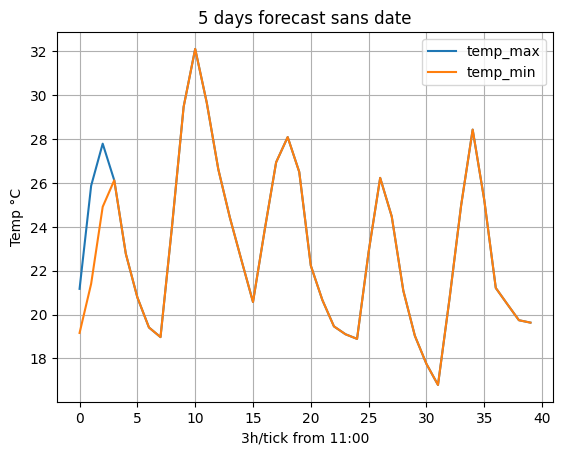

In [159]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [160]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

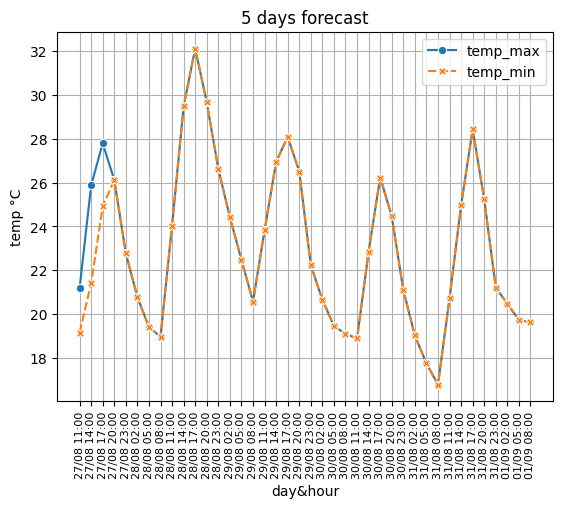

In [161]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

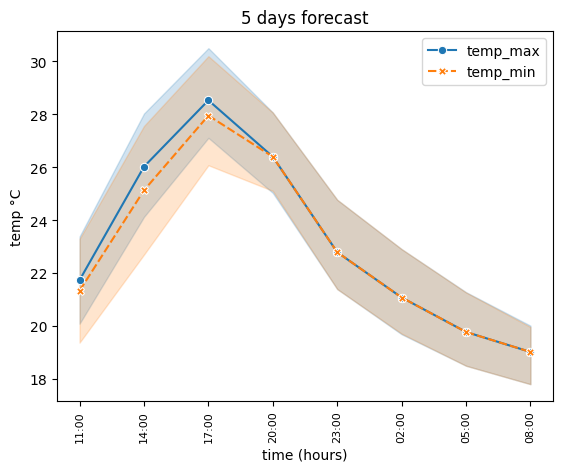

In [162]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 